In [1]:
import os
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import matplotlib as mpl
import pickle as pickle

Check numpy and scipy

The code will run faster for $z > 1$ if you use these see also the `README.md`:

`/afs/ifh.de/group/that/work-jh/git/scipy/scipy/`  
`/afs/ifh.de/group/that/work-jh/git/numpy/numpy/`

In [2]:
import inspect
print(inspect.getmodule(sc))
print(inspect.getmodule(np))

<module 'scipy' from 'C:\\Users\\afedy\\Miniconda3\\lib\\site-packages\\scipy\\__init__.py'>
<module 'numpy' from 'C:\\Users\\afedy\\Miniconda3\\lib\\site-packages\\numpy\\__init__.py'>


In [3]:
import prince_config
from prince import core, util, photonfields, cross_sections
from prince import util as pru

# **Important**: Run `Create_Kernel.ipynb` before trying this example

# Reload the pickled kernel

You need to reload the kenrel that was pickled in the example in   `examples/Create_Kernel.ipynb`

Adjust the path to where you saved it to

In [4]:
%%time
# lustre = os.path.expanduser("~/data/prince_kernels/")
with open('../data/prince_run_talys_test.ppo','rb') as thefile:
    prince_run = pickle.load(thefile)

Wall time: 2.12 s


# Run a solver using the loaded kernel

**Note:** We use a backward differentiation solver (BDF) here (`UHECRPropagationSolverBDF`)  
There are other options in `prince/solvers`, however these are not robustly tested.  
**So when in doubt use BDF**

In [5]:
from prince.solvers import UHECRPropagationSolverBDF
from prince.cr_sources import AugerFitSource,RigdityCutoffSource

**Note:** The photonfield was set together with the solver in `examples/Create_Kernel.ipynb`

However we can still replace it here:

In [6]:
pf_gilmore = photonfields.CombinedPhotonField(
    [photonfields.CMBPhotonSpectrum,photonfields.CIBGilmore2D])
prince_run.int_rates.photon_field = pf_gilmore

**Step 1:** Initiate solver class

In [7]:
solver = UHECRPropagationSolverBDF(initial_z=3., final_z = 0.,prince_run=prince_run,
                                   enable_pairprod_losses = True, enable_adiabatic_losses = True,
                                   enable_injection_jacobian = True, enable_partial_diff_jacobian=True)

**Step 2:** Create a source class and add it to the solver

**Note:** There are more source classes defined in `prince/sources.py`

In [8]:
rmax = 10**9.68
gamma = 0.96
total_norm = 1e-50

f_hydrogen = 0.
f_helium = 67.3
f_nitrogen = 28.1
f_silicon = 4.6
f_iron = 0.

# NOTE: You can add as much as you want here.
# you can also add several source classes. But that will be slower, if there are many
solver.add_source_class(
    AugerFitSource(prince_run, norm = total_norm,
                   params={101: (gamma, rmax, f_hydrogen),
                           402: (gamma, rmax, f_helium),
                           1407: (gamma, rmax, f_nitrogen),
                           2814: (gamma, rmax, f_silicon),
                           5626: (gamma, rmax, f_iron)}))

**Note:** We add here only one source, but one could in principle add any number of sources here  
(For a large number of different source classes, the solver will get slow)

**Step 3:** Run the solver

In [9]:
%time solver.solve(dz=1e-3,verbose=False,progressbar=True)

UHECRPropagationSolverBDF::solve(): Setting up Solver


c:\users\afedy\devel\git\prince\prince\photonfields.py:122: RuntimeWarning: overflow encountered in exp
  nlocal = pref * Ered**2 / (np.exp(Ered / E_CMB) - 1.0)
c:\users\afedy\devel\git\prince\prince\photonfields.py:122: RuntimeWarning: overflow encountered in exp
  nlocal = pref * Ered**2 / (np.exp(Ered / E_CMB) - 1.0)
  0%|                                                                                       | 0/3000.0 [00:00<?, ?it/s]

UHECRPropagationSolverBDF::solve(): Solver initialized in 5.205724716186523 s
UHECRPropagationSolverBDF::solve(): Starting integration.


c:\users\afedy\devel\git\prince\prince\photonfields.py:122: RuntimeWarning: overflow encountered in exp
  nlocal = pref * Ered**2 / (np.exp(Ered / E_CMB) - 1.0)
  0%|▏                                                                              | 6/3000.0 [00:00<06:15,  7.98it/s]

custom_mod 10 0.0001000000000139778 0.001


  0%|▏                                                                              | 8/3000.0 [00:01<07:01,  7.10it/s]

custom_mod 10 0.0009999999999998899 0.001


  0%|▎                                                                             | 10/3000.0 [00:01<07:27,  6.69it/s]

custom_mod 10 0.0009999999999998899 0.001


  0%|▎                                                                             | 12/3000.0 [00:01<07:49,  6.36it/s]

custom_mod 10 0.0009999999999998899 0.001


  0%|▎                                                                             | 14/3000.0 [00:02<08:05,  6.15it/s]

custom_mod 10 0.0009999999999998899 0.001


  1%|▍                                                                             | 17/3000.0 [00:02<07:14,  6.87it/s]

custom_mod 10 0.0009999999999998899 0.001


  1%|▍                                                                             | 18/3000.0 [00:02<09:42,  5.12it/s]

custom_mod 10 0.0009999999999998899 0.001


  1%|▌                                                                             | 20/3000.0 [00:03<09:29,  5.23it/s]

custom_mod 10 0.0009999999999998899 0.001


  1%|▌                                                                             | 22/3000.0 [00:03<09:12,  5.39it/s]

custom_mod 10 0.0009999999999998899 0.001


  1%|▌                                                                             | 24/3000.0 [00:03<09:00,  5.50it/s]

custom_mod 10 0.0009999999999998899 0.001


  1%|▋                                                                             | 26/3000.0 [00:04<08:49,  5.61it/s]

custom_mod 10 0.0009999999999998899 0.001


  1%|▋                                                                             | 28/3000.0 [00:04<09:16,  5.34it/s]

custom_mod 10 0.0009999999999998899 0.001


  1%|▊                                                                             | 30/3000.0 [00:05<09:00,  5.50it/s]

custom_mod 10 0.0009999999999998899 0.001


  1%|▊                                                                             | 32/3000.0 [00:05<08:54,  5.56it/s]

custom_mod 10 0.0009999999999998899 0.001


  1%|▉                                                                             | 34/3000.0 [00:05<08:48,  5.61it/s]

custom_mod 10 0.0009999999999998899 0.001


  1%|▉                                                                             | 36/3000.0 [00:06<08:46,  5.63it/s]

custom_mod 10 0.0009999999999998899 0.001


  1%|█                                                                             | 39/3000.0 [00:06<07:37,  6.47it/s]

custom_mod 10 0.0009999999999998899 0.001


  1%|█                                                                             | 40/3000.0 [00:06<09:57,  4.95it/s]

custom_mod 10 0.0009999999999998899 0.001


  1%|█                                                                             | 42/3000.0 [00:07<09:29,  5.19it/s]

custom_mod 10 0.0009999999999998899 0.001


  1%|█▏                                                                            | 44/3000.0 [00:07<09:08,  5.39it/s]

custom_mod 10 0.0009999999999998899 0.001


  2%|█▏                                                                            | 46/3000.0 [00:07<08:57,  5.50it/s]

custom_mod 10 0.0009999999999998899 0.001


  2%|█▏                                                                            | 48/3000.0 [00:08<08:44,  5.63it/s]

custom_mod 10 0.0009999999999998899 0.001


  2%|█▎                                                                            | 50/3000.0 [00:08<09:04,  5.41it/s]

custom_mod 10 0.0009999999999998899 0.001


  2%|█▎                                                                            | 52/3000.0 [00:09<08:52,  5.53it/s]

custom_mod 10 0.0009999999999998899 0.001


  2%|█▍                                                                            | 54/3000.0 [00:09<08:45,  5.61it/s]

custom_mod 10 0.0009999999999998899 0.001


  2%|█▍                                                                            | 56/3000.0 [00:09<08:34,  5.72it/s]

custom_mod 10 0.0009999999999998899 0.001


  2%|█▌                                                                            | 58/3000.0 [00:10<08:29,  5.77it/s]

custom_mod 10 0.0009999999999998899 0.001


  2%|█▌                                                                            | 61/3000.0 [00:10<07:23,  6.62it/s]

custom_mod 10 0.0009999999999998899 0.001


  2%|█▌                                                                            | 62/3000.0 [00:10<09:44,  5.03it/s]

custom_mod 10 0.0009999999999998899 0.001


  2%|█▋                                                                            | 64/3000.0 [00:11<09:18,  5.25it/s]

custom_mod 10 0.0009999999999998899 0.001


KeyboardInterrupt: 

# Now plot the result

In [10]:
import sys
sys.path.append('../../UHECRanalyzer/')

In [11]:
from analyzer.spectra import auger2015, auger2017
data = auger2017
data_label = 'Auger 2017'

First normalize roughly to the spectrum

In [12]:
result = solver.res

edata = auger2015['energy']
norm = auger2015['spectrum'][17] / result.get_solution_group('CR',egrid=edata)[1][17]
print(f'{norm:.2e}')

result = result * norm

inf


c:\users\afedy\devel\git\prince\prince\solvers\propagation.py:121: RuntimeWarning: divide by zero encountered in log
  np.log(curr_spec),
C:\Users\afedy\Miniconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.
c:\users\afedy\devel\git\prince\prince\solvers\propagation.py:66: RuntimeWarning: invalid value encountered in multiply
  newstate = self.state * number


### Plot the spectrum

C:\Users\afedy\Miniconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  del sys.path[0]
C:\Users\afedy\Miniconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  del sys.path[0]
C:\Users\afedy\Miniconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  del sys.path[0]
C:\Users\afedy\Miniconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  del sys.path[0]
C:\Users\afedy\Miniconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  del sys.path[0]
C:\Users\afedy\Miniconda3\lib\site-packages\ipykernel_launcher.py:24: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
C:\Users\afedy\Minicon

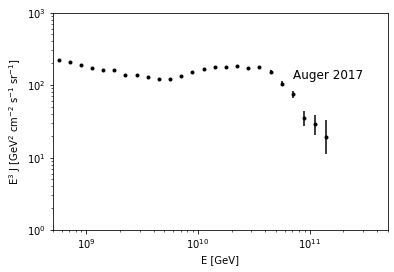

In [13]:
import matplotlib.pyplot as plt

ncoid2sref = result.spec_man.ncoid2sref
A = lambda x: ncoid2sref[x].A

for group, color, label, loffset in zip([(A,1,1),(A,2,4),(A,5,14),(A,15,28),(A,29,56)],
                             ['red','gray','green','orange','blue'],
                             [r'$\mathrm{A} = 1$',r'$2 \leq \mathrm{A} \leq 4$',r'$5 \leq \mathrm{A} \leq 14$',
                              r'$15 \leq \mathrm{A} \leq 28$','$29 \leq \mathrm{A} \leq 56$'],
                             [0, 0, 0 , 0, 0]):

    energy, spectrum = result.get_solution_group(group)
    l = plt.loglog(energy, spectrum, label=label, c=color, alpha = 0.6)
    maxidx = spectrum.argmax()
    loc = (energy[maxidx+loffset], spectrum[maxidx+loffset] / 1.5)
    
    # only plot annotations, if they are roughly within plot range
    # otherwise there are clipping errors
    if 5e8 < loc[0] < 5e11 and 1e0 < loc[1] < 1e3:
        plt.annotate(label, loc, color=color, weight = 'bold', fontsize = 10,
                    horizontalalignment='center', verticalalignment='top')

energy, spectrum = result.get_solution_group('CR')
l = plt.loglog(energy, spectrum, c='saddlebrown')

plt.errorbar(data['energy'], data['spectrum'],
             yerr=(data['lower_err'], data['upper_err']),
             fmt='o', color='black', label = data_label,markersize=3)
plt.annotate(data_label,(data['energy'][-4],data['spectrum'][-4]*1.5),fontsize=12,
             horizontalalignment='left', verticalalignment='bottom')
# plt.legend(ncol=1, loc='lower left', fontsize='small')

plt.xlim(5e8,5e11)
plt.ylim(1e0,1e3)

plt.ylabel('E$^3$ J [GeV$^{2}$ cm$^{-2}$ s$^{-1}$ sr$^{-1}$]')
plt.xlabel('E [GeV]')

plt.show()

**Expected output:**

![**expected output**](../data/ref_figures/talys_spectrum.png)

### Plot the composition

In [14]:
from analyzer.xmax import XmaxSimple
from analyzer.spectra import Xmax2015,Xmax2017,XRMS2015,XRMS2017

Helper functions for plotting

In [15]:
# %load ../scripts/xmax_plot.py
def make_error_boxes(xdata, ydata, xerror, yerror, facecolor='r',
                     edgecolor='None', alpha=0.5):

    ax = plt.gca()
    from matplotlib.collections import PatchCollection
    from matplotlib.patches import Rectangle

    # Create list for all the error patches
    errorboxes = []

    # Loop over data points; create box from errors at each point
    for x, y, xe, ye in zip(xdata, ydata, xerror.T, yerror.T):
        rect = Rectangle((x - xe[0], y - ye[0]), xe.sum(), ye.sum())
        errorboxes.append(rect)

    # Create patch collection with specified colour/alpha
    pc = PatchCollection(errorboxes, facecolor=facecolor, alpha=alpha,
                         edgecolor=edgecolor)

    # Add collection to axes
    ax.add_collection(pc)

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

### Plot the mean $\langle X_\mathrm{max} \rangle$

c:\users\afedy\devel\git\prince\prince\solvers\propagation.py:149: RuntimeWarning: invalid value encountered in true_divide
  lnA[:, np.newaxis] * spectra).sum(axis=0) / spectra.sum(axis=0)
c:\users\afedy\devel\git\prince\prince\solvers\propagation.py:151: RuntimeWarning: invalid value encountered in true_divide
  spectra).sum(axis=0) / spectra.sum(axis=0) - average**2


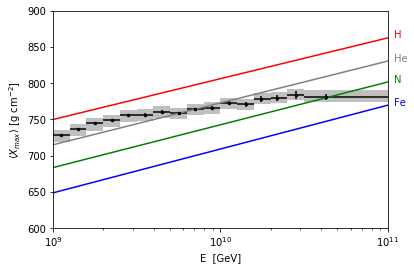

In [16]:
deltaE = 0.
xshift=0.
model=XmaxSimple(model=XmaxSimple.EPOSLHC)
data=Xmax2017
data_label=r'\langle Xmax \rangle Auger 2017'
    
egrid, average, variance = result.get_lnA([el for el in result.known_species if el >= 100])
energy = egrid
energy *= 1 + deltaE
mean_lnA = average
sigma_lnA = variance

import matplotlib.pyplot as plt
# plot the reference models
for A, c, name in zip([1,4,14,56], ['red','gray','green','blue'],['H','He','N','Fe']):
    Xmax = model.get_mean_Xmax(np.log(A), energy)
    plt.semilogx(energy,Xmax, color = c)
    idx = find_nearest(energy,1e11)
    plt.annotate(name,(energy[idx+1],Xmax[idx]),color = c,annotation_clip=False)

Xmax = model.get_mean_Xmax(mean_lnA, energy)
plt.semilogx(energy, Xmax, color = 'saddlebrown', ls ='solid')

xerr = np.array((data['energy_Low'], data['energy_Up']))
yerr = np.array((data['sys_Low'], data['sys_Up']))
make_error_boxes(data['energy'], data['val'], xerr, yerr, facecolor='gray')

if xshift > 0:
    xcorr = xshift * data['sys_Up']
else:
    xcorr = xshift * data['sys_Low']

plt.errorbar(data['energy'], data['val'] + xcorr,
             xerr=(data['energy_Low'], data['energy_Up']),
             yerr=(data['stat'], data['stat']),
             fmt='o',markersize=2.5, label=data_label, c='black')

plt.xlim(1e9,1e11)
plt.ylim(600,900)
plt.xlabel('E  [GeV]')
plt.ylabel(r'$\langle X_{max} \rangle$ [g cm$^{-2}$]')

plt.show()

**Expected output:**

![**expected output**](../data/ref_figures/talys_meanxmax.png)

### Plot the variance $\sigma(X_\mathrm{max})$

c:\users\afedy\devel\git\prince\prince\solvers\propagation.py:149: RuntimeWarning: invalid value encountered in true_divide
  lnA[:, np.newaxis] * spectra).sum(axis=0) / spectra.sum(axis=0)
c:\users\afedy\devel\git\prince\prince\solvers\propagation.py:151: RuntimeWarning: invalid value encountered in true_divide
  spectra).sum(axis=0) / spectra.sum(axis=0) - average**2


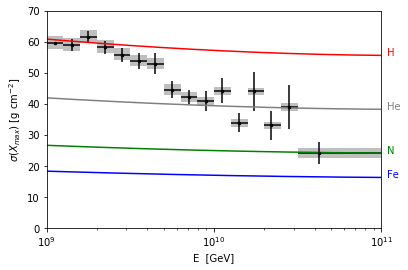

In [17]:
deltaE = 0.
xshift=0.
model=XmaxSimple(model=XmaxSimple.EPOSLHC)
data=XRMS2017
data_label=r'\langle Xmax \rangle Auger 2017'
    
egrid, average, variance = result.get_lnA([el for el in result.known_species if el >= 100])
energy = egrid
energy *= 1 + deltaE
mean_lnA = average
var_lnA = variance

import matplotlib.pyplot as plt
for A, c, name in zip([1,4,14,56], ['red','gray','green','blue'],['H','He','N','Fe']):
    sigmaXmax, sigmaXmax_part = np.sqrt(model.get_var_Xmax(np.log(A), 0., energy))
    plt.semilogx(energy,sigmaXmax, color = c)
    idx = find_nearest(energy,1e11)
    plt.annotate(name,(energy[idx+1],sigmaXmax[idx]),color = c,annotation_clip=False)

sigmaXmax, sigmaXmax_part = np.sqrt(model.get_var_Xmax(mean_lnA, var_lnA, energy))
plt.semilogx(energy,sigmaXmax, color = 'saddlebrown', ls ='solid')
#     plt.semilogx(energy,sigmaXmax_part, color = 'saddlebrown', ls ='dashed')

xerr = np.array((data['energy_Low'], data['energy_Up']))
yerr = np.array((data['sys_Low'], data['sys_Up']))
make_error_boxes(data['energy'], data['val'], xerr, yerr, facecolor='gray')

if xshift > 0:
    xcorr = xshift * data['sys_Up']
else:
    xcorr = xshift * data['sys_Low']

plt.errorbar(data['energy'], data['val'] + xcorr,
             xerr=(data['energy_Low'], data['energy_Up']),
             yerr=(data['stat'], data['stat']),
             fmt='o',markersize=2.5, label='Xmax Auger 2015', c='black')

plt.xlim(1e9,1e11)
plt.ylim(0,70)
plt.xlabel('E  [GeV]')
plt.ylabel(r'$\sigma( X_{max})$ [g cm$^{-2}$]')

plt.show()

**Expected output:**

![**expected output**](../data/ref_figures/talys_sigmaxmax.png)

### Cosmogenic Neutrinos

C:\Users\afedy\Miniconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  import sys


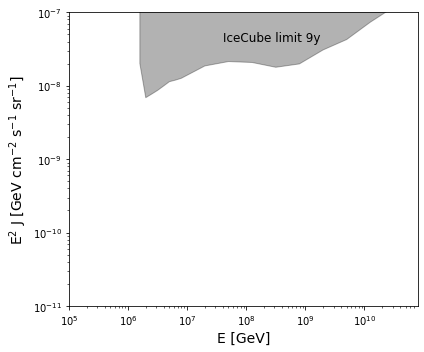

In [18]:
plt.figure(figsize=(6,5))

alpha = 0.3
handles=[]

egrid, spec = result.get_solution_group('nu',epow=2)
plt.loglog(egrid,spec,c='black',label='best fit')

from analyzer.spectra import IClimit2017, IClimit2017GRB, IClimit9year
from analyzer.spectra import IClimit9year_new as IClimit9year

plt.fill_between(IClimit9year['energy'], IClimit9year['limit'], np.ones_like(IClimit9year['energy']),
                 color='black',alpha= 0.3)
plt.annotate('IceCube limit 9y',(4e7,4e-8), fontsize = 'large')

plt.ylim(1e-11,1e-7)
plt.xlim(1e5,IClimit9year['energy'][-1].value)

plt.ylabel('E$^2$ J [GeV cm$^{-2}$ s$^{-1}$ sr$^{-1}$]',fontsize=14)
plt.xlabel('E [GeV]',fontsize=14)

plt.tight_layout()

plt.show()

**Expected output:**

![**expected output**](../data/ref_figures/talys_neutrinos.png)